## IMPORT LIBRARIES & LOAD DATA



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())
display(df)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df["overall_avg"] = df[["math score", "reading score", "writing score"]].mean(axis=1)


In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.dpi"] = 300
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

## Gender Boxplots (Math vs Reading)

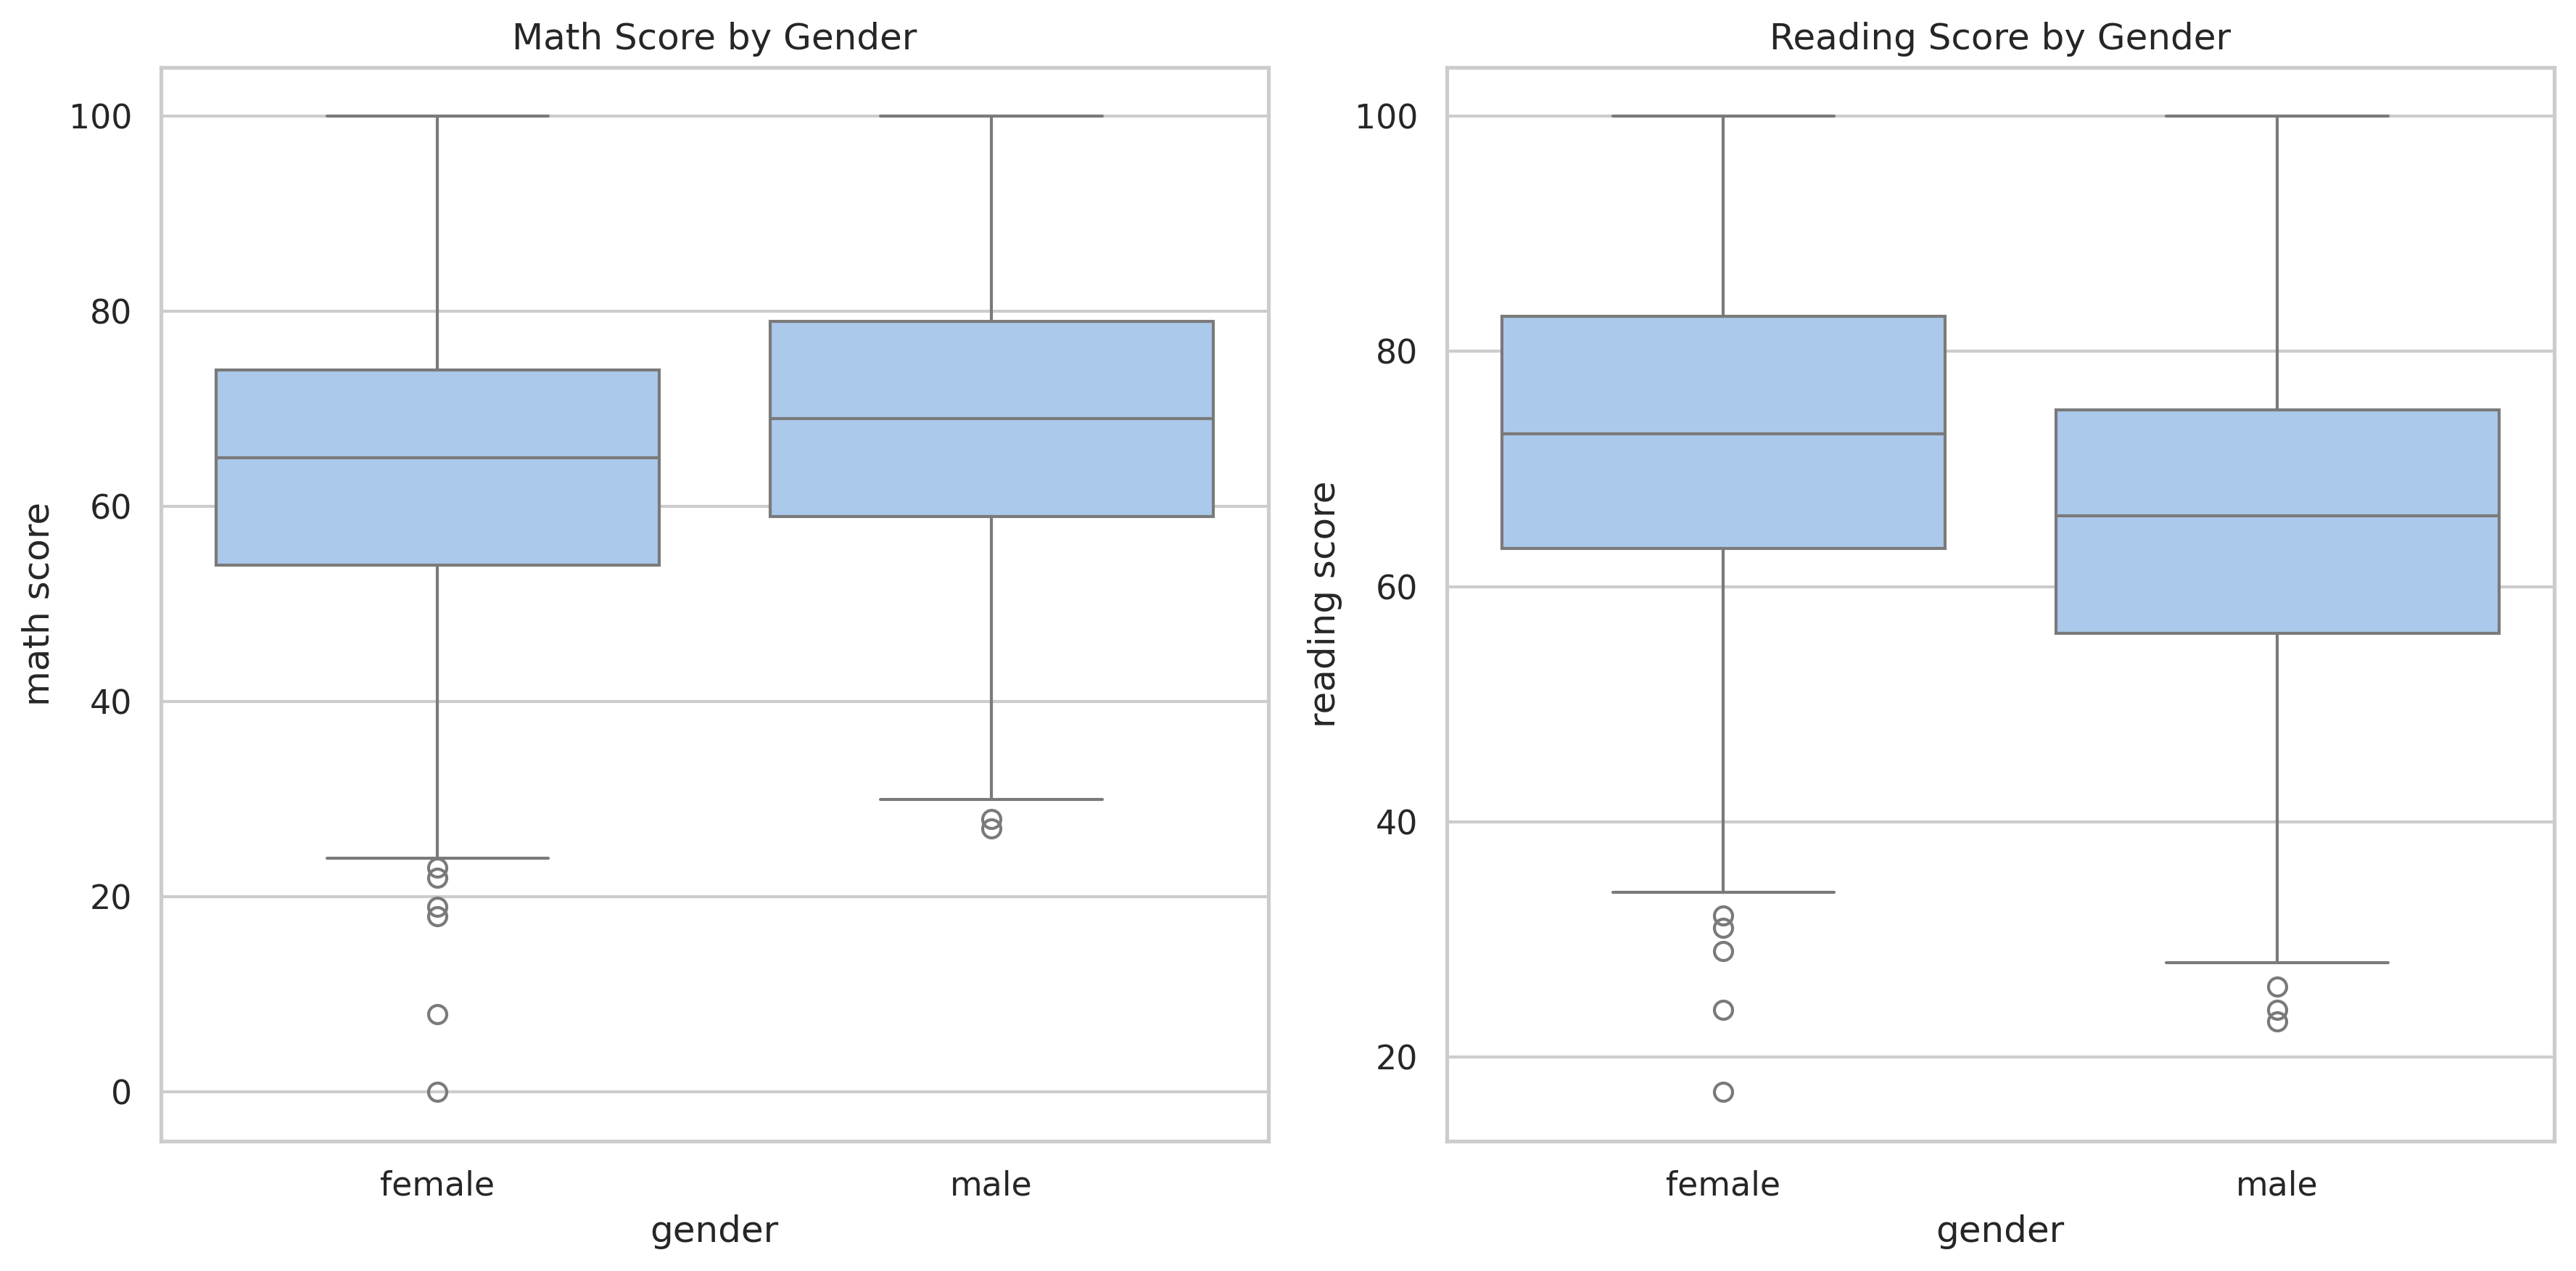

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="gender", y="math score", data=df, ax=ax[0])
ax[0].set_title("Math Score by Gender")

sns.boxplot(x="gender", y="reading score", data=df, ax=ax[1])
ax[1].set_title("Reading Score by Gender")

plt.tight_layout()
plt.show()


# Test Preparation Impact on Math

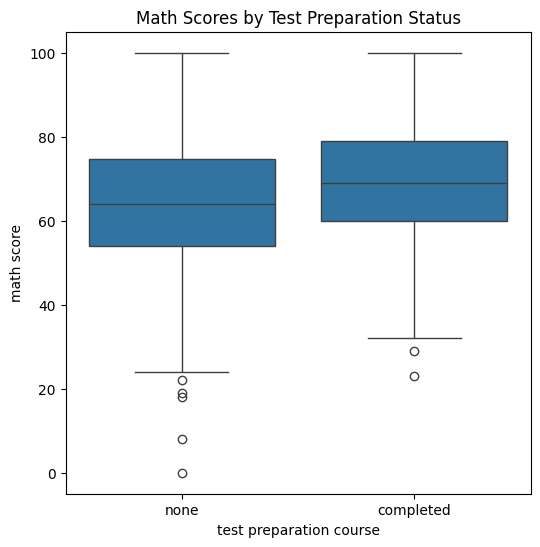

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Math Scores by Test Preparation Status")
plt.show()



# Lunch Type and Average Performance

/tmp/ipython-input-1580743981.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="lunch", y="overall_avg", data=df, estimator=np.mean, ci=None)


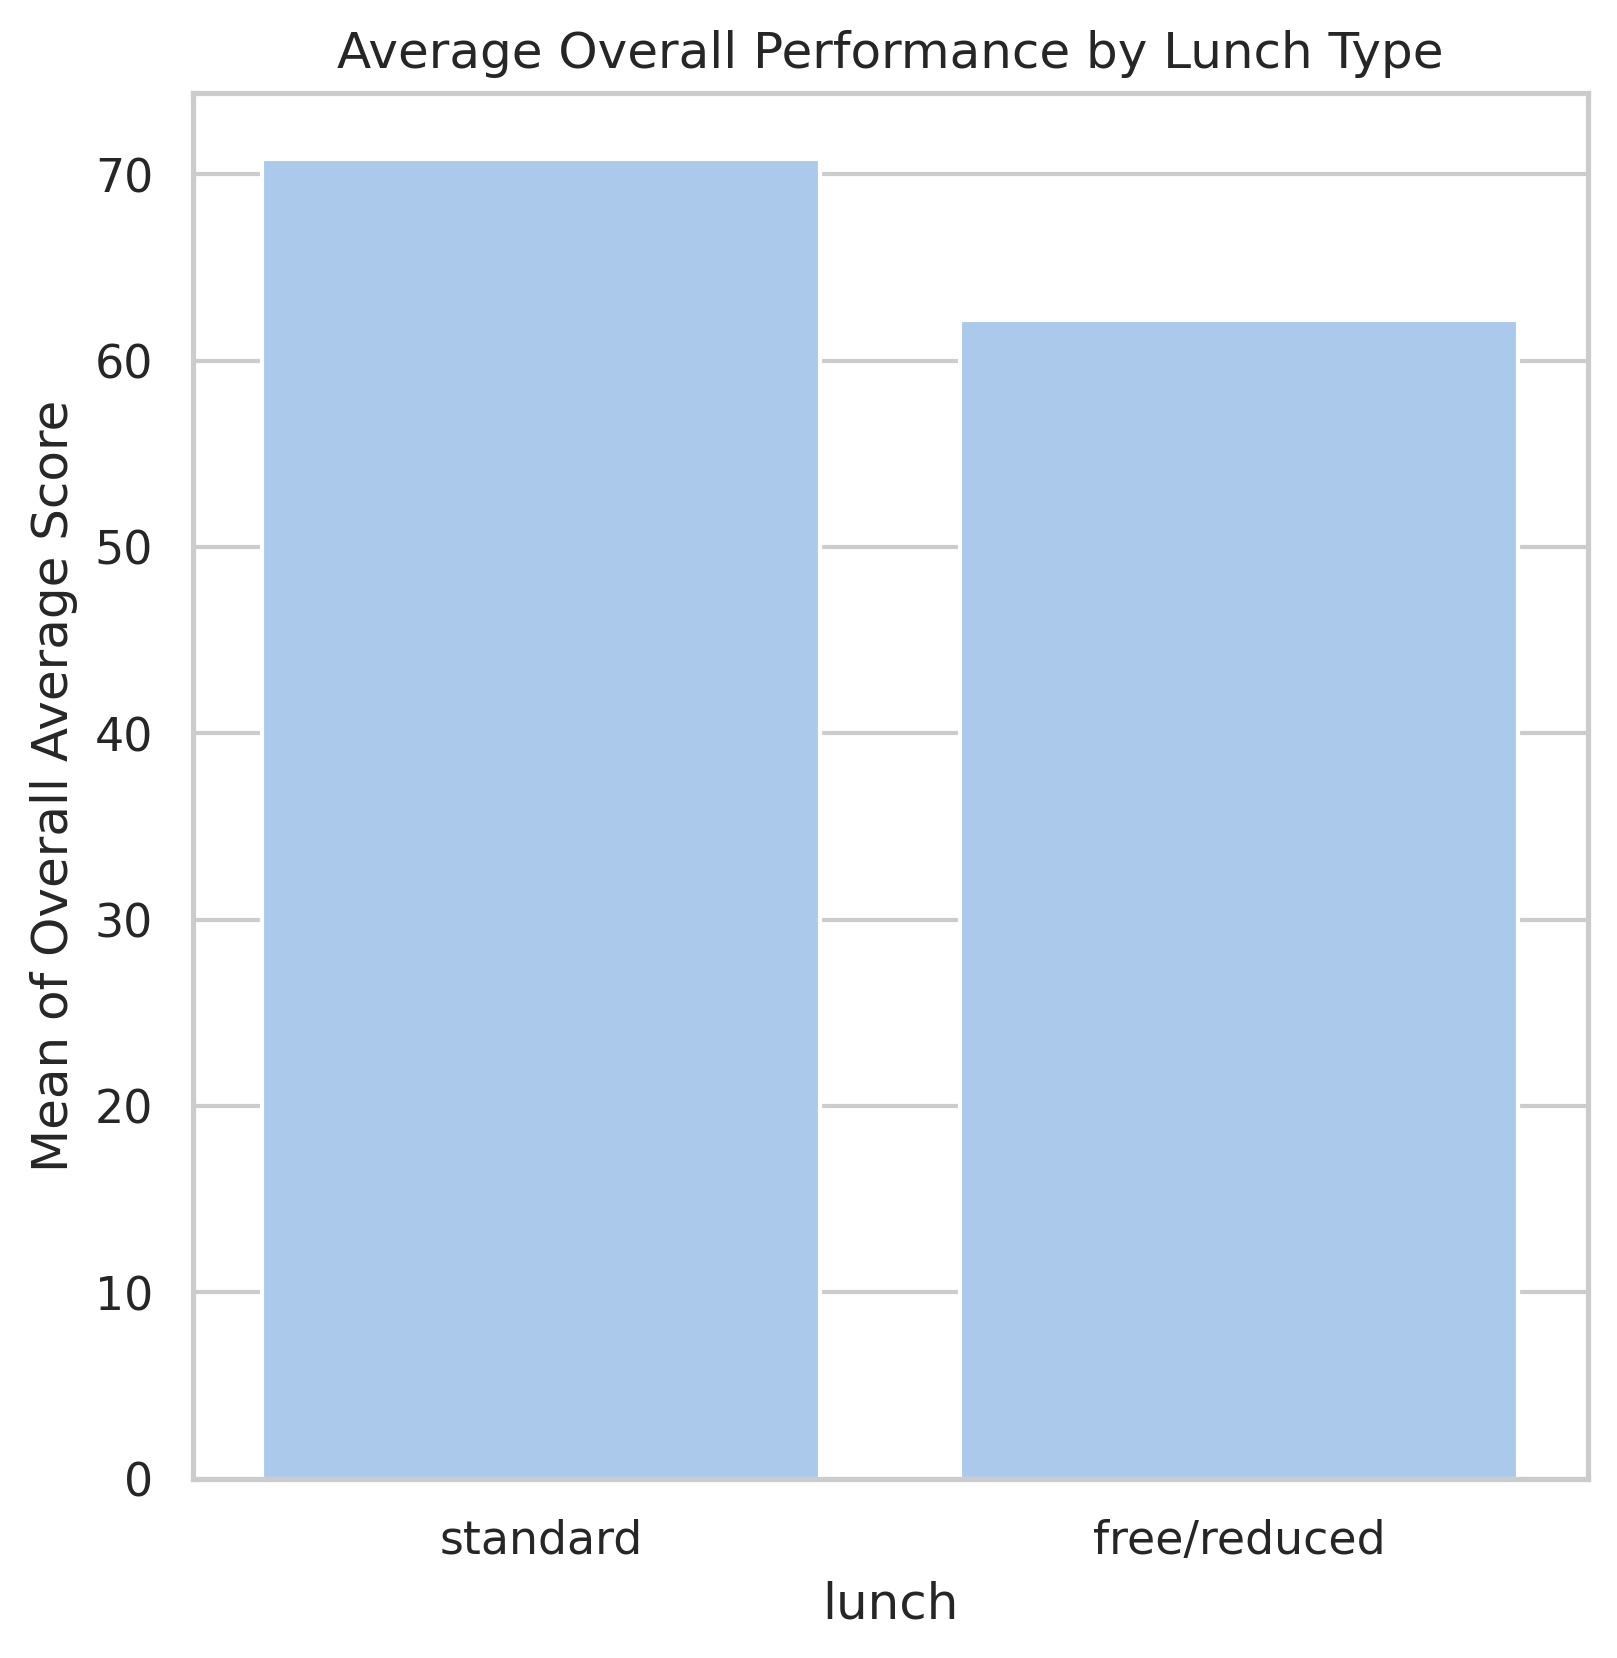

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x="lunch", y="overall_avg", data=df, estimator=np.mean, ci=None)
plt.title("Average Overall Performance by Lunch Type")
plt.ylabel("Mean of Overall Average Score")
plt.show()

# Subject Correlations

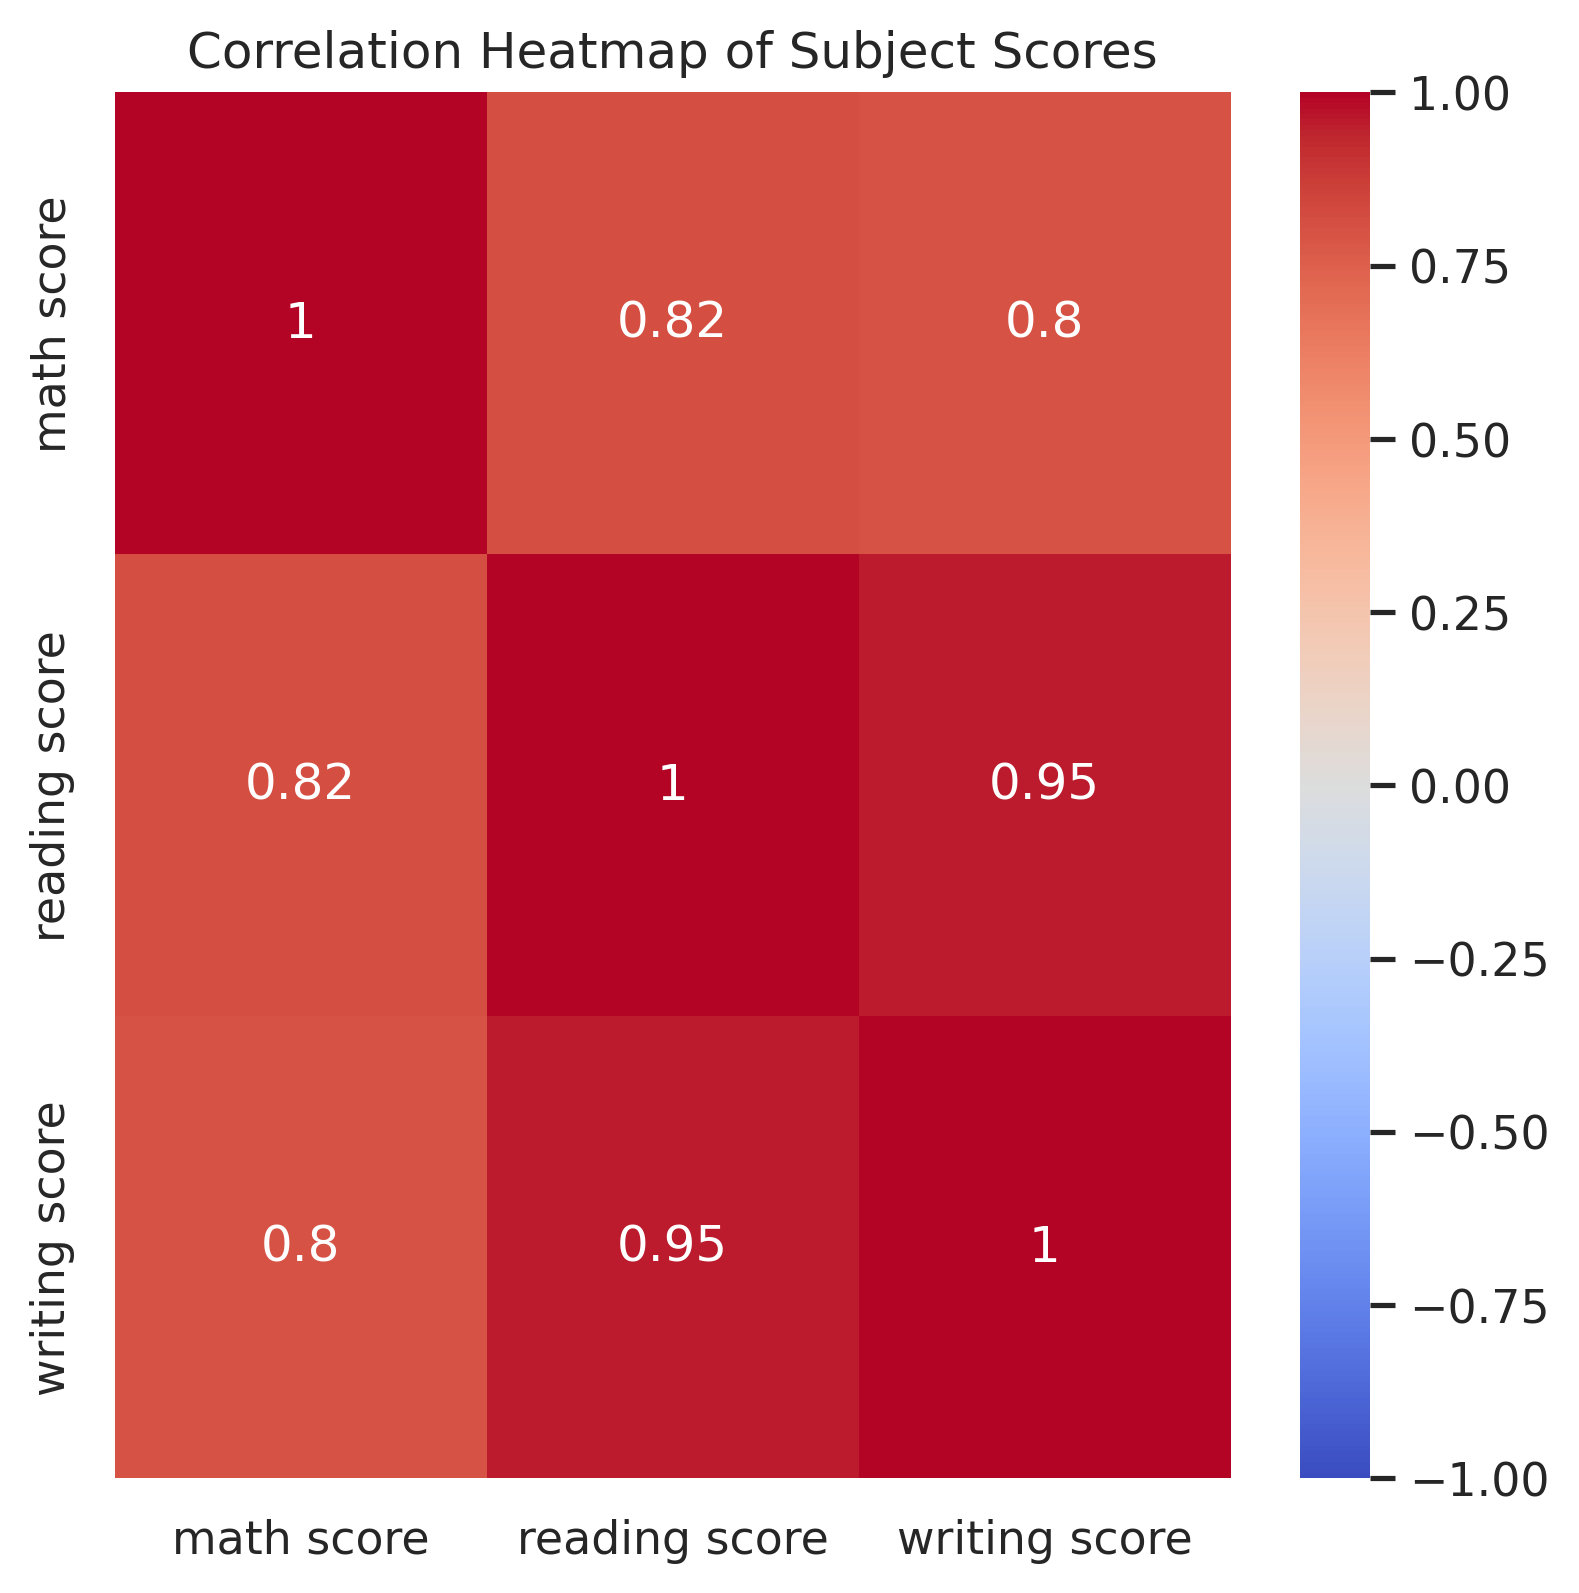

In [ ]:
plt.figure(figsize=(6, 6))
corr = df[["math score", "reading score", "writing score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Subject Scores")
plt.show()

## Math vs Reading with Trend Lines by Test Prep

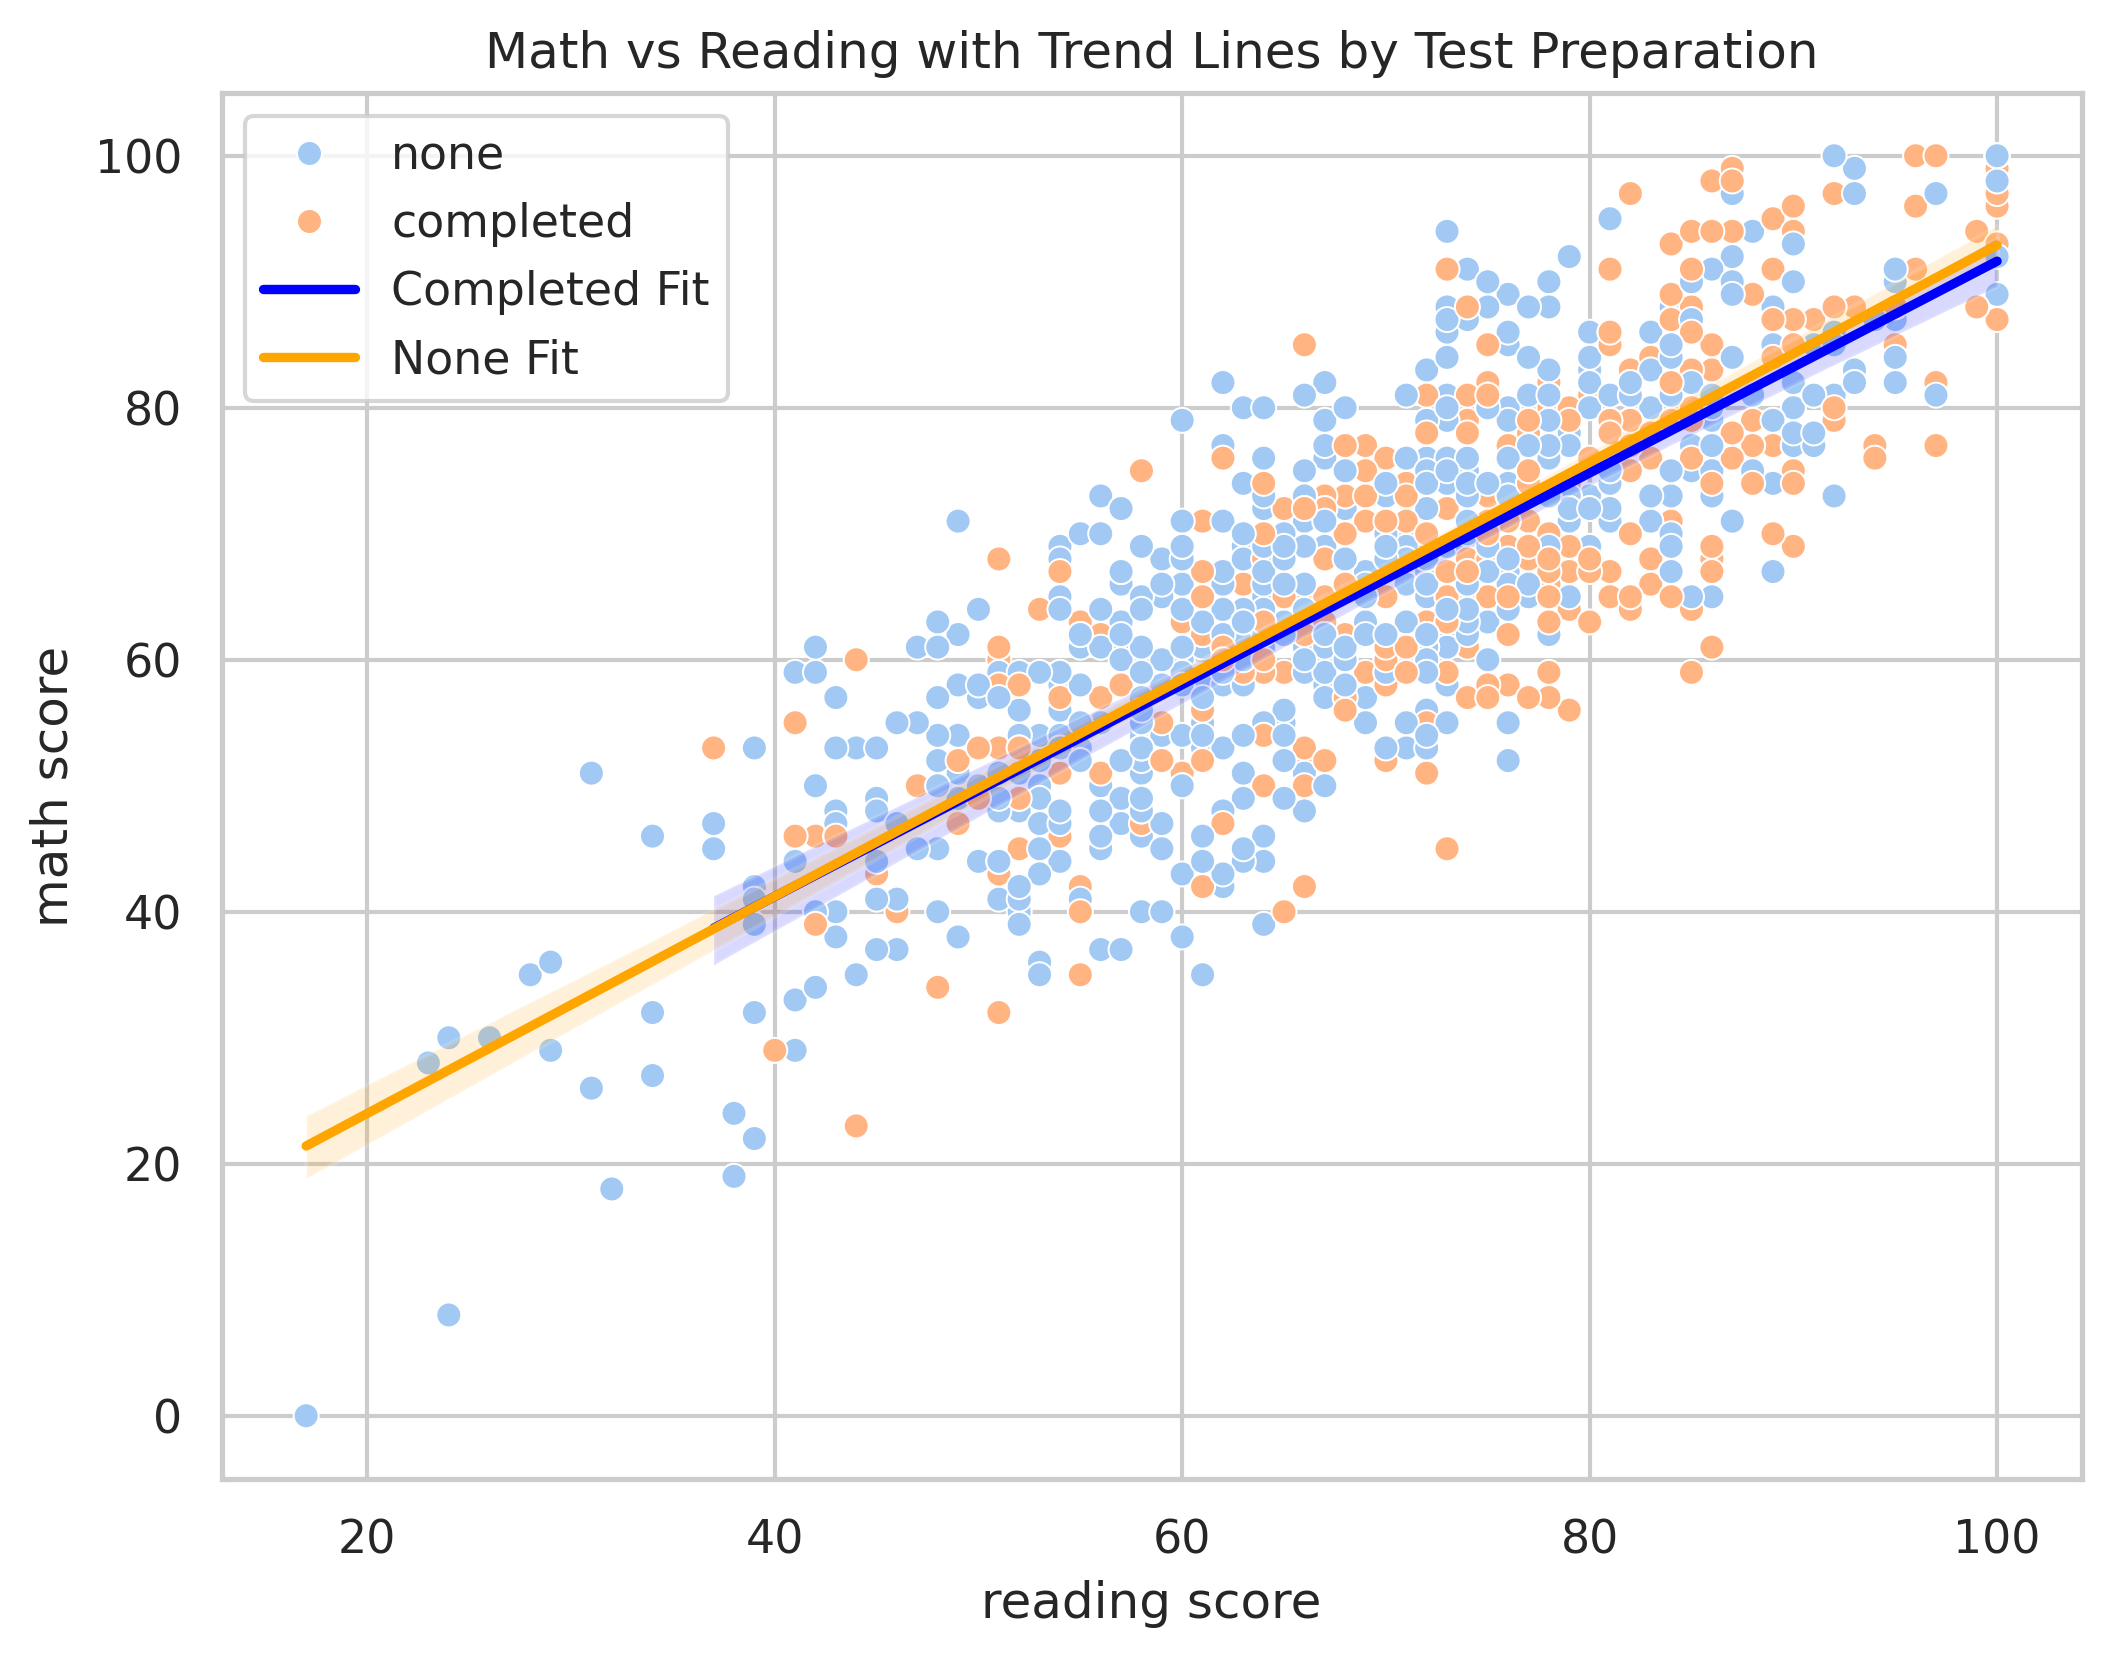

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="reading score",
    y="math score",
    hue="test preparation course",
    data=df
)
sns.regplot(
    x="reading score",
    y="math score",
    data=df[df["test preparation course"]=="completed"],
    scatter=False, label="Completed Fit", color="blue"
)
sns.regplot(
    x="reading score",
    y="math score",
    data=df[df["test preparation course"]=="none"],
    scatter=False, label="None Fit", color="orange"
)

plt.title("Math vs Reading with Trend Lines by Test Preparation")
plt.legend()
plt.show()
